### Load saved results object

In [3]:
import pickle
with open('../output/bert_results_20_06_topic_classification.pkl', 'rb') as f:
    aggregate_result =  pickle.load(f)
#with open('../output/result_03_23_tfidf.pkl', 'rb') as f:
#    aggregate_result.extend(pickle.load(f))

vanilla


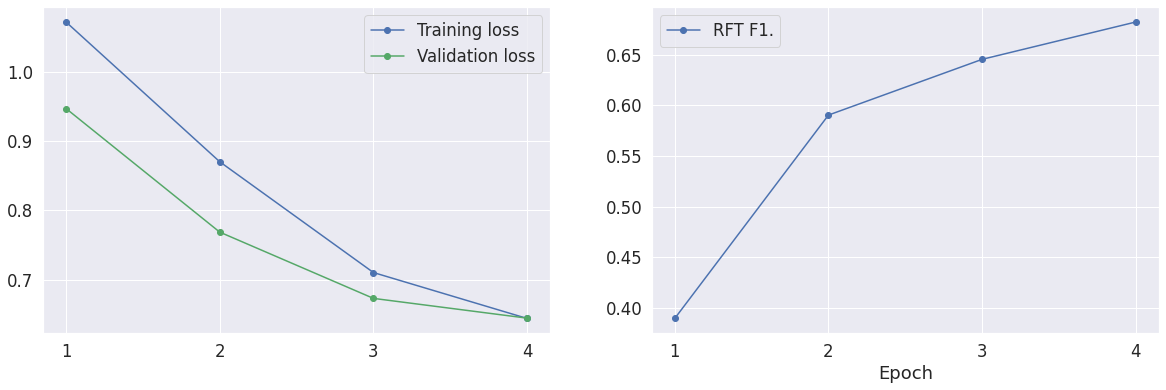

vanilla
              precision    recall  f1-score   support

           0       0.69      0.91      0.78        66
           1       0.78      0.58      0.67        36
           2       0.74      0.62      0.68        77

    accuracy                           0.72       179
   macro avg       0.74      0.71      0.71       179
weighted avg       0.73      0.72      0.71       179

mask


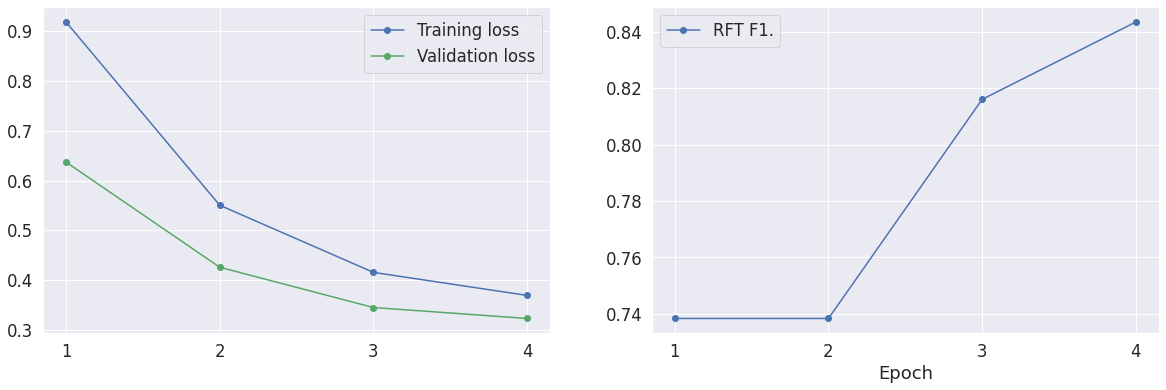

mask
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        36
           2       0.43      1.00      0.60        77

    accuracy                           0.43       179
   macro avg       0.14      0.33      0.20       179
weighted avg       0.19      0.43      0.26       179

delete


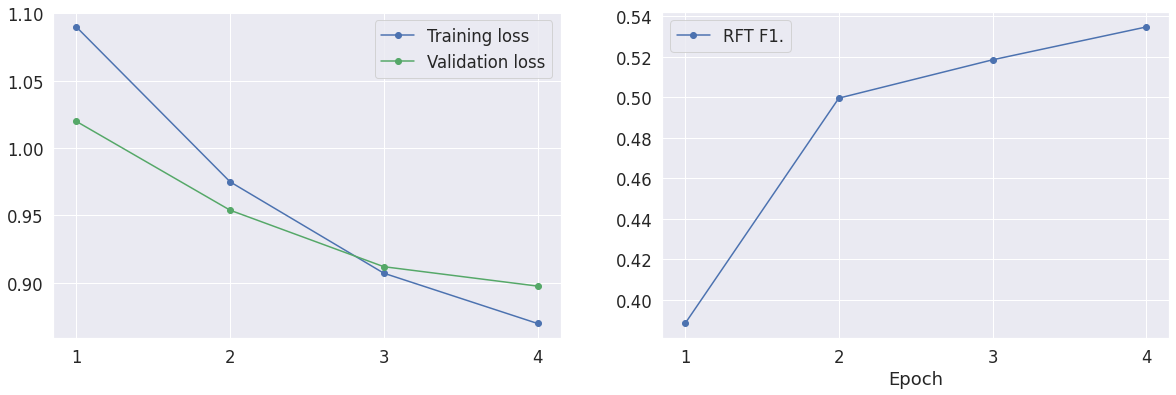

delete
              precision    recall  f1-score   support

           0       0.56      0.89      0.69        66
           1       0.67      0.17      0.27        36
           2       0.58      0.48      0.52        77

    accuracy                           0.57       179
   macro avg       0.60      0.51      0.49       179
weighted avg       0.59      0.57      0.53       179



In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
def plot_stats(training_stats):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    pd.set_option('precision', 2)
    df_stats = pd.DataFrame(data=training_stats)
    df_stats = df_stats.set_index('epoch')
    sns.set(style='darkgrid')
    sns.set(font_scale=1.5)
    plt.rcParams["figure.figsize"] = (20, 6)
    plt.setp((ax1, ax2), xticks=[1,2,3,4])
    # LOSS
    ax1.plot(df_stats['Training Loss'], 'b-o', label="Training loss")
    #ax1.plot(df_stats['Topic Training Loss'], 'k-o', label="Topic training loss")
    #ax1.plot(df_stats['Topic Valid. Loss'], 'r-o', label="Topic Validation loss")
    ax1.plot(df_stats['Valid. Loss'], 'g-o', label="Validation loss")
    #ax1.title("Training & Validation Loss")
    #ax1.ylabel("Loss")
    ax1.legend()

    # F1 score
    ax2.plot(df_stats['Valid. F1.'], 'b-o', label="RFT F1.")
    #ax2.plot(df_stats['Topic Valid. F1.'], 'g-o', label="Topic F1.")
    #ax2.title("RFT & Topic Validation F1_macro")
    #ax2.ylabel("Accuracy")

    plt.xlabel("Epoch")
    ax2.legend()
    plt.show()


for agg in aggregate_result:
    if agg.mode=='holdout':
        print(agg.ref)
        print(agg.classification_report)
    else:
        print(agg.ref)
        plot_stats(agg.train_stats)

### 1. Plot all models

In [ ]:
import warnings
warnings.filterwarnings('ignore')   
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

def getcolor(ref):
    if ref == 'masked':
        return '#008080'
    elif ref == 'vanilla':
        return '#5f9ea0'
    elif 'False' in ref:
        return '#000000'
    elif 'None' in ref:
        return '#d2691e'
    else:
        return '#4682b4'
def update_label(ref):
    if 'adversarial_False' in ref:
        return 'multitask_'
    elif 'None' in ref:
        return 'lambda dynamic 0 to 1_' 
    elif 'adversarial_True' in ref:
        return '_'.join(['lambda', ref.split('_')[-1]])
    elif 'test_delete_False' in ref:
        return ref.split('_')[0] + '_bert'
    else:
        return ref

data = {vars(agg)['ref']:vars(agg)['f1_macro'] for agg in aggregate_result if agg.mode == "holdout" and "delete_True" not in agg.ref}
data = pd.DataFrame(data.items())
data.columns = ['model', 'fscore']
data['colors'] = data.model.apply(getcolor)
data['model_def'] = data.model.apply(update_label)
data = data.sort_values('fscore')
fig, ax = plt.subplots()
data.plot(kind='barh', x='model_def', y='fscore', color = data.colors, ax=ax, figsize=(8,7)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()





In [ ]:
data_all = [{"model":vars(agg)['ref'], "RFT_fscore":vars(agg)['f1_macro'], "topic_fscore":vars(agg)['topic_f1_macro']} 
             for agg in aggregate_result if agg.mode == "holdout" and "adversarial"  in agg.ref]
pd.DataFrame(data_all)


### 2. Compare annotations

In [ ]:
def get_lambda(x):
    return x.split('_')[1]
data_sub = data[data['model_def'].str.contains("lambda_")]
data_sub['lambda'] = data_sub['model_def'].apply(get_lambda)
data_annotated = data_sub[data_sub['model_def'].str.contains("annotated")][['fscore', 'lambda']].sort_values('lambda')
data_lexicon = data_sub[data_sub['model_def'].str.contains("lexicon")][['fscore', 'lambda']].sort_values('lambda')
df = pd.DataFrame({'annotated':list(data_annotated.fscore),
                   'lexicon':list(data_lexicon.fscore)}, index = list(data_lexicon['lambda']))
ax = df.plot.barh(ylabel = 'F1_macro', xlabel = 'lambda').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Plot training stats

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_stats(training_stats):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    pd.set_option('precision', 2)
    df_stats = pd.DataFrame(data=training_stats)
    df_stats = df_stats.set_index('epoch')
    sns.set(style='darkgrid')
    sns.set(font_scale=1.5)
    plt.rcParams["figure.figsize"] = (20, 6)
    plt.setp((ax1, ax2), xticks=[1,2,3,4])
    # LOSS
    ax1.plot(df_stats['Training Loss'], 'b-o', label="Training loss")
    ax1.plot(df_stats['Topic Training Loss'], 'k-o', label="Topic training loss")
    ax1.plot(df_stats['Topic Valid. Loss'], 'r-o', label="Topic Validation loss")
    ax1.plot(df_stats['Valid. Loss'], 'g-o', label="Validation loss")
    #ax1.title("Training & Validation Loss")
    #ax1.ylabel("Loss")
    ax1.legend()

    # F1 score
    ax2.plot(df_stats['Valid. F1.'], 'b-o', label="Topic F1.")
    ax2.plot(df_stats['Topic Valid. F1.'], 'g-o', label="RFT F1.")
    #ax2.title("RFT & Topic Validation F1_macro")
    #ax2.ylabel("Accuracy")

    plt.xlabel("Epoch")
    ax2.legend()
    plt.show()

    
def f(model):
    stats = [agg.train_stats for agg in aggregate_result if agg.ref==model and agg.mode=='train-test'][0]
    plot_stats(stats)
             
model_widget = widgets.Dropdown(options=[agg.ref for agg in aggregate_result if agg.mode=='train-test' and 'tfidf' not in agg.ref and 'delete_True' not in agg.ref], description='model_name')
interact(f, model=model_widget)

### Explain predictions

In [ ]:
examples = {'promotion':['Ich bin recht zuversichtlich, dass ich das Studium schaffe.'
                     'Die Prüfung kannst du dir locker zutrauen.',
                     'Da Studium ist auch dazu da, dass man sich weiterentwickelt.',
                     'Mit dem Auto habe ich mir einen Traum verwirklicht.',
                     'Ich fühlte mich ziemlich selbstsicher als ich mit dem Bus fuhr.'
                     'Ich sehnte mich nach meinem Freund.',
                     'Mich reizt die Fahrt an den Gardasee sehr',
                     'Mit einem schnellen Auto kann ich bei den Mädchen punkten.'],

            'prevention' :['Ich war ziemlich ängstlich vor der Prüfung.',
                     'Der Aufwand während des Studiums war enorm und kaum zu schaffen.',
                     'Im Studium musste ich viele Prüfungen ablegen, vor denen ich eine große Aversion hatte.',
                     'Es ist ziemlich bedenklich wie du dein Auto fährst.',
                     'Du solltest etwas besonnener mit deinem Auto fahren.',
                     'Ich bin echt besorgt wie du mit deinem Auto unterwegs bist, nimm doch besser den Bus.',
                     'Ich brauchte heute morgen so lange, so dass ich fürchtete, den Bus zu verpassen.',
                     'In dieser Zeit hat mir mein Freund sehr gefehlt.',
                     'Ich konnte mit dem Auto nicht weiterfahren weil die Straße gesperrt war.',
                     'Mein Freund hindert mich an meiner Entwicklung.']}

In [ ]:
import pandas as pd
holdout_data_path = '../data/reg_focus_holdout_data.csv'
data = pd.read_csv(holdout_data_path)
examples= {"promotion": [text.rstrip() for text, label in zip(data.text,data.focus) if label == 'promotion' and len(text.split())>15][:10],
          "prevention": [text.rstrip() for text, label in zip(data.text,data.focus) if label == 'prevention' and len(text.split())>15][:10]}                                                                                                                 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from lime.lime_text import LimeTextExplainer
from bert4seqclassification_modified import BertForSequenceClassification
from transformers import BertTokenizerFast
import torch
from lime.lime_text import LimeTextExplainer
class_names = ['promotion', 'prevention']
explainer = LimeTextExplainer(class_names=class_names)
model_path = '/mount/arbeitsdaten/tcl/Users/aswathy/models'

def get_logits(sent):
    encoded_dict = tokenizer.encode_plus(
            sent,
            add_special_tokens=True,
            max_length=420,
            truncation=True,
            padding='longest',
            return_attention_mask=True,
            return_tensors='pt',
        )
    model.cuda()
    input_ids = encoded_dict["input_ids"].detach().clone().to('cuda')
    attention_mask = encoded_dict["attention_mask"].detach().clone().to('cuda')
    output = model(input_ids, attention_mask)
    return output.logits

def predict_proba(samples):
    probs = []
    for i, sent in enumerate(samples):
        softmax = torch.nn.functional.softmax(get_logits(sent), dim=1)
        probability = softmax.tolist()[0]
        probs.append(probability)
    return np.array(probs)


In [ ]:
import progressbar
import os
    
for focus, sents in examples.items():
    for i, sent in enumerate(sents):
        print("*******************START*********************")

        for model_name in list(set([agg.ref for agg in aggregate_result])):
            print(model_name)

            print("TRUE LABEL: ", focus)
            if not os.path.exists('../explanations/'+model_name):
                os.makedirs('../explanations/'+model_name)
            fname = '../explanations/'+model_name+'/'+"_".join([focus,str(i),'holdout'])+'.html'
            if not os.path.exists(fname):
                model = BertForSequenceClassification.from_pretrained(model_path+'/_'+model_name)
                tokenizer = BertTokenizerFast.from_pretrained(model_path+'/_'+model_name)
                exp = explainer.explain_instance(sent, predict_proba) #, num_samples=)
                exp.save_to_file(fname,text=True)
            else:
                print("explanation exists")
        print("*******************END*********************")

    

### Analyse explanations

In [ ]:
from IPython.core.display import display, HTML

files = os.listdir('../explanations/vanilla/')
models = os.listdir('../explanations')
models
model_names =     {'vanilla' : 'vanilla',
                   'masked_test_delete_False' : 'masked',
                   'adversarial_True_lexicon_label_0.2': 'lambda_0.2',
                   'adversarial_True_lexicon_label_0.4': 'lambda_0.4',
                   'adversarial_True_lexicon_label_0.8': 'lambda_0.8',
                   'adversarial_True_lexicon_label_1.0' : 'lambda_1.0',

                   'adversarial_False_lexicon_label_None': 'multi_task',
                   'adversarial_True_lexicon_label_None' : 'variable_lambda',
                  }
selected_models = []
for f in files:
    for k in selected_models:
        display(model_names[k] +" _ "+f)
        display(HTML('../explanations/'+k+'/'+f))

# TODO select models, select explanations

In [ ]:
import progressbar
import os
for model_name in set(['vanilla']+[agg.ref for agg in aggregate_result]):
    print(model_name)
    model = BertForSequenceClassification.from_pretrained(model_path+'/_'+model_name)
    tokenizer = BertTokenizerFast.from_pretrained(model_path+'/_'+model_name)
    sent = 'Mit einem schnellen Studium kann ich bei den Mädchen punkten.'
    exp = explainer.explain_instance(sent, predict_proba, num_features=6, num_samples=2000)
    exp.show_in_notebook(text=True)
    sent = 'Mit einem schnellen Auto kann ich bei den Mädchen punkten.'
    exp = explainer.explain_instance(sent, predict_proba, num_features=6, num_samples=2000)
    exp.show_in_notebook(text=True)

### Attention visualization

In [ ]:
%%capture
import sys
!test -d bertviz_repo && echo "FYI: bertviz_repo directory already exists, to pull latest version uncomment this line: !rm -r bertviz_repo"
# !rm -r bertviz_repo # Uncomment if you need a clean pull from repo
!test -d bertviz_repo || git clone https://github.com/jessevig/bertviz bertviz_repo
if not 'bertviz_repo' in sys.path:
  sys.path += ['bertviz_repo']
!pip install regex
!pip install transformers
!pip install boto3

In [ ]:
def call_html():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              "d3": "https://cdnjs.cloudflare.com/ajax/libs/d3/5.7.0/d3.min",
              jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
            },
          });
        </script>
        '''))

In [ ]:
from bertviz import head_view, model_view
from transformers import BertTokenizer, BertModel
from transformers import BertTokenizerFast, BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained(model_path+'/'+'_vanilla')
tokenizer = BertTokenizerFast.from_pretrained(model_path+'/'+'_vanilla')

In [ ]:
sentence_a = 'Mit einem schnellen Auto kann ich bei den Mädchen punkten.'
inputs = tokenizer.encode_plus(sentence_a, return_tensors='pt', add_special_tokens=True)
token_type_ids = inputs['token_type_ids']
input_ids = inputs['input_ids']
attention = model(input_ids, token_type_ids=token_type_ids)[-1]
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list)
call_html()

head_view(attention, tokens)

### Shap plots

In [ ]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from transformers import BertTokenizerFast
from bert4seqclassification_modified import BertForSequenceClassification
import shap
import scipy as sp
import torch
model_path = '/mount/arbeitsdaten/tcl/Users/aswathy/models'
model = BertForSequenceClassification.from_pretrained(model_path+'/'+'_masked').cuda()
tokenizer = BertTokenizerFast.from_pretrained(model_path+'/'+'_masked')

In [ ]:
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=128,truncation=True) for v in x]).cuda()
    attention_mask = (tv!=0).type(torch.int64).cuda()
    outputs = model(tv,attention_mask=attention_mask).logits.detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores) 
    return val

In [ ]:
# set mapping between label and id
id2label = model.config.id2label
label2id = model.config.label2id
labels = sorted(label2id, key=label2id.get)

In [ ]:
explainer = shap.Explainer(f,tokenizer,output_names=['promotion','prevention'])

In [ ]:
shap_values = explainer(examples['promotion']+examples['prevention'])

### Words positively contributed to label

In [ ]:
shap.plots.bar(shap_values[:,:,"promotion"].mean(0), order=shap.Explanation.argsort.flip)

### Words negatively contributed to label

In [ ]:
shap.plots.bar(shap_values[:,:,"prevention"].mean(0), order=shap.Explanation.argsort)

In [ ]:
pd.DataFrame([{'promotion': 753, 'prevention': 724},{'prevention': 99, 'promotion': 80}]).plot.bar()